## Preprocessing

In [1]:
# Import our dependencies
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
import pandas as pd
# import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# IRS Data

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
irs_data_df = pd.read_csv("Resources/IRS_NY_2020.csv")
irs_data_df

,ZipCode,Number of returns,Total income Amount (In thousand of dollars),Average total income
0,10001,15590,2830868,181582.29630
1,10002,41020,2697332,65756.50902
2,10003,25780,6953211,269713.38250
3,10004,2220,1047897,472025.67570
4,10005,5530,2374656,429413.38160
...,...,...,...,...
1533,14901,5460,222977,40838.27839
1534,14903,3630,246522,67912.39669
1535,14904,6900,287843,41716.37681
1536,14905,4330,318597,73578.98383


In [4]:
# View the data types
print(irs_data_df.dtypes)

ZipCode                                           int64
Number of returns                                 int64
Total income Amount (In thousand of dollars)      int64
Average total income                            float64
dtype: object


In [5]:
# Convert float64 data to integers
irs_data_df['Average total income'] = irs_data_df['Average total income'].astype('int')
print(irs_data_df.dtypes)

ZipCode                                         int64
Number of returns                               int64
Total income Amount (In thousand of dollars)    int64
Average total income                            int32
dtype: object


# NYC Licensing Data

In [6]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
nyc_licensing_df = pd.read_csv("Resources/NYC_Dog_Licensing_Dataset_20240218.csv")
nyc_licensing_df

C:\Users\sylhu\AppData\Local\Temp\ipykernel_11176\1022353120.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_licensing_df = pd.read_csv("Resources/NYC_Dog_Licensing_Dataset_20240218.csv")


,AnimalName,AnimalGender,AnimalBirthYear,BreedName,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,10035.0,09/12/2014,09/12/2017,2016
1,YOGI,M,2010,Boxer,10465.0,09/12/2014,10/02/2017,2016
2,ALI,M,2014,Basenji,10013.0,09/12/2014,09/12/2019,2016
3,QUEEN,F,2013,Akita Crossbreed,10013.0,09/12/2014,09/12/2017,2016
4,LOLA,F,2009,Maltese,10028.0,09/12/2014,10/09/2017,2016
...,...,...,...,...,...,...,...,...
616885,SKYE,F,2016,Great Pyrenees,11218.0,11/01/2023,12/02/2024,2023
616886,UNKNOWN,F,2023,Shih Tzu Crossbreed,10022.0,11/01/2023,11/01/2024,2023
616887,MUNYU,M,2009,"Poodle, Toy",11355.0,11/01/2023,11/24/2024,2023
616888,SAINT,M,2021,Unknown,11412.0,11/01/2023,11/01/2024,2023


In [7]:
# View the data types
print(nyc_licensing_df.dtypes)

AnimalName             object
AnimalGender           object
AnimalBirthYear        object
BreedName              object
ZipCode               float64
LicenseIssuedDate      object
LicenseExpiredDate     object
Extract Year            int64
dtype: object


In [8]:
# Replace NaN with 0 
nyc_licensing_df['ZipCode'].fillna(0, inplace=True)

# Convert to integer
nyc_licensing_df['ZipCode'] = nyc_licensing_df['ZipCode'].astype('int')
print(nyc_licensing_df.dtypes)

AnimalName            object
AnimalGender          object
AnimalBirthYear       object
BreedName             object
ZipCode                int32
LicenseIssuedDate     object
LicenseExpiredDate    object
Extract Year           int64
dtype: object


In [9]:
# Determine the number of unique values in each column.
nyc_licensing_df.nunique()

AnimalName            32083
AnimalGender              2
AnimalBirthYear          76
BreedName              1591
ZipCode                 911
LicenseIssuedDate      3337
LicenseExpiredDate     4869
Extract Year              5
dtype: int64

# Merge IRS NY data with NYC Licensing Zip Code data

In [10]:
# Combine two csv files by using the ZipCode Column.
merged_df = pd.merge(irs_data_df, nyc_licensing_df, on='ZipCode', how='left')
merged_df

,ZipCode,Number of returns,Total income Amount (In thousand of dollars),Average total income,AnimalName,AnimalGender,AnimalBirthYear,BreedName,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,10001,15590,2830868,181582,BANDIT,M,2014,Shih Tzu,10/07/2014,10/07/2016,2016.0
1,10001,15590,2830868,181582,SCOOBY,M,2012,"Schnauzer, Miniature",11/19/2014,09/06/2016,2016.0
2,10001,15590,2830868,181582,GRACE,F,2011,Shiba Inu,11/25/2014,11/25/2016,2016.0
3,10001,15590,2830868,181582,TUCKER,M,2005,"Bull Dog, English",12/03/2014,01/30/2016,2016.0
4,10001,15590,2830868,181582,DAISY,F,2012,"Bull Dog, English",01/09/2015,01/09/2017,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
612861,14901,5460,222977,40838,CHESTER,M,2021,Maltipoo,01/16/2023,01/27/2024,2023.0
612862,14903,3630,246522,67912,ZEKE,M,2022,German Shepherd Dog,07/28/2022,07/28/2023,2023.0
612863,14904,6900,287843,41716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612864,14905,4330,318597,73578,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop the non-beneficial columns
merged_df.drop(['Number of returns', 'Total income Amount (In thousand of dollars)', 'AnimalName'], axis=1, inplace=True)
merged_df

,ZipCode,Average total income,AnimalGender,AnimalBirthYear,BreedName,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,10001,181582,M,2014,Shih Tzu,10/07/2014,10/07/2016,2016.0
1,10001,181582,M,2012,"Schnauzer, Miniature",11/19/2014,09/06/2016,2016.0
2,10001,181582,F,2011,Shiba Inu,11/25/2014,11/25/2016,2016.0
3,10001,181582,M,2005,"Bull Dog, English",12/03/2014,01/30/2016,2016.0
4,10001,181582,F,2012,"Bull Dog, English",01/09/2015,01/09/2017,2016.0
...,...,...,...,...,...,...,...,...
612861,14901,40838,M,2021,Maltipoo,01/16/2023,01/27/2024,2023.0
612862,14903,67912,M,2022,German Shepherd Dog,07/28/2022,07/28/2023,2023.0
612863,14904,41716,NaN,NaN,NaN,NaN,NaN,NaN
612864,14905,73578,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# View the data types
print(merged_df.dtypes)

ZipCode                   int64
Average total income      int32
AnimalGender             object
AnimalBirthYear          object
BreedName                object
LicenseIssuedDate        object
LicenseExpiredDate       object
Extract Year            float64
dtype: object


In [13]:
# Convert to integer
merged_df['Average total income'] = merged_df['Average total income'].astype('int')
print(merged_df.dtypes)

ZipCode                   int64
Average total income      int32
AnimalGender             object
AnimalBirthYear          object
BreedName                object
LicenseIssuedDate        object
LicenseExpiredDate       object
Extract Year            float64
dtype: object


In [14]:
# Replace NaN with 0 
merged_df['Extract Year'].fillna(0, inplace=True)

# Convert to integer
merged_df['Extract Year'] = merged_df['Extract Year'].astype('int')
print(merged_df.dtypes)

ZipCode                  int64
Average total income     int32
AnimalGender            object
AnimalBirthYear         object
BreedName               object
LicenseIssuedDate       object
LicenseExpiredDate      object
Extract Year             int32
dtype: object


In [15]:
# Determine the number of unique values in each column.
merged_df.nunique()

ZipCode                 1538
Average total income    1515
AnimalGender               2
AnimalBirthYear           76
BreedName               1584
LicenseIssuedDate       3337
LicenseExpiredDate      4868
Extract Year               6
dtype: int64

In [16]:
# Export DataFrame to a CSV file
merged_df.to_csv('merged_df.csv', index=False)

# Analyze Data - Review Correlations

In [17]:
# Calculate the correlation between the Average-total-income and ZipCode
correlation = merged_df['Average total income'].corr(merged_df['ZipCode'])
print(correlation)

-0.5135861842173098


# Group ZipCodes to 5 NYC Boroughs

In [18]:
# Brooklyn:11201-11256
# Manhattan:10001-10282
# Queens:11004-11109, 11351-11697
# Staten Island :10301-10314
# Bronx: 10451-10475

In [19]:
# Make five Boroughs
def categorize_zipcode(zip_code):
    # Brooklyn
    if 11201 <= zip_code <= 11256:
        return 'Brooklyn'
    # Manhattan
    elif 10001 <= zip_code <= 10282:
        return 'Manhattan'
    # Queens
    elif (11004 <= zip_code <= 11109) or (11351 <= zip_code <= 11697):
        return 'Queens'
    # Staten Island
    elif 10301 <= zip_code <= 10314:
        return 'Staten Island'
    # Bronx
    elif 10451 <= zip_code <= 10475:
        return 'Bronx'
    else:
        return 'Others'

# Applying the function to the DataFrame
merged_df['Borough'] = merged_df['ZipCode'].apply(categorize_zipcode)

# Display the DataFrame to verify the categorization
merged_df

,ZipCode,Average total income,AnimalGender,AnimalBirthYear,BreedName,LicenseIssuedDate,LicenseExpiredDate,Extract Year,Borough
0,10001,181582,M,2014,Shih Tzu,10/07/2014,10/07/2016,2016,Manhattan
1,10001,181582,M,2012,"Schnauzer, Miniature",11/19/2014,09/06/2016,2016,Manhattan
2,10001,181582,F,2011,Shiba Inu,11/25/2014,11/25/2016,2016,Manhattan
3,10001,181582,M,2005,"Bull Dog, English",12/03/2014,01/30/2016,2016,Manhattan
4,10001,181582,F,2012,"Bull Dog, English",01/09/2015,01/09/2017,2016,Manhattan
...,...,...,...,...,...,...,...,...,...
612861,14901,40838,M,2021,Maltipoo,01/16/2023,01/27/2024,2023,Others
612862,14903,67912,M,2022,German Shepherd Dog,07/28/2022,07/28/2023,2023,Others
612863,14904,41716,NaN,NaN,NaN,NaN,NaN,0,Others
612864,14905,73578,NaN,NaN,NaN,NaN,NaN,0,Others


In [20]:
# Drop rows where 'Borough' column has the value 'Others'
boroughs_df = merged_df[merged_df['Borough'] != 'Others']
boroughs_df

,ZipCode,Average total income,AnimalGender,AnimalBirthYear,BreedName,LicenseIssuedDate,LicenseExpiredDate,Extract Year,Borough
0,10001,181582,M,2014,Shih Tzu,10/07/2014,10/07/2016,2016,Manhattan
1,10001,181582,M,2012,"Schnauzer, Miniature",11/19/2014,09/06/2016,2016,Manhattan
2,10001,181582,F,2011,Shiba Inu,11/25/2014,11/25/2016,2016,Manhattan
3,10001,181582,M,2005,"Bull Dog, English",12/03/2014,01/30/2016,2016,Manhattan
4,10001,181582,F,2012,"Bull Dog, English",01/09/2015,01/09/2017,2016,Manhattan
...,...,...,...,...,...,...,...,...,...
611288,11697,110414,F,2021,German Shepherd Crossbreed,08/24/2023,10/09/2024,2023,Queens
611289,11697,110414,M,2016,Unknown,09/12/2023,08/26/2024,2023,Queens
611290,11697,110414,F,2012,German Shepherd Dog,09/13/2023,11/03/2024,2023,Queens
611291,11697,110414,F,2016,Labrador Retriever Crossbreed,09/15/2023,05/25/2024,2023,Queens


In [21]:
# View the data types
boroughs_df.dtypes

ZipCode                  int64
Average total income     int32
AnimalGender            object
AnimalBirthYear         object
BreedName               object
LicenseIssuedDate       object
LicenseExpiredDate      object
Extract Year             int32
Borough                 object
dtype: object

# Clean up the BreedName and Drop unnecessary columns

In [22]:
# Clean up the BreedName to match to the other team mate's breedname
## Get all unique values in the 'BreedName' column
unique_breeds = boroughs_df['BreedName'].unique()

# Printing all unique names
for name in unique_breeds:
    print(name)

Shih Tzu
Schnauzer, Miniature
Shiba Inu
Bull Dog, English
Yorkshire Terrier
Miniature Pinscher
Australian Shepherd
French Bulldog
Boston Terrier
Unknown
Labrador Retriever
Cavalier King Charles Spaniel
Cocker Spaniel
Bull Dog, French
Labrador Retriever Crossbreed
Dachshund, Long Haired
American Pit Bull Terrier/Pit Bull
Vizsla
Golden Retriever
Maltese
German Shepherd Dog
Welsh Corgi, Pembroke
Dachshund
Poodle, Miniature
West High White Terrier
American Pit Bull Mix / Pit Bull Mix
Chihuahua
Wheaton Terrier
Pomeranian
Pug
Beagle Crossbreed
Havanese
Border Collie
Jack Russell Terrier
Shetland Sheepdog
American Staffordshire Terrier
Rhodesian Ridgeback
German Shepherd Crossbreed
Poodle, Toy
Puggle
English Cocker Spaniel
Bichon Frise
Tibetan Terrier
Lhasa Apso
Wire Fox Terrier
Terrier mix
Australian Cattle Dog
Beagle
Chihuahua Crossbreed
Treeing Walker Coonhound
Silky Terrier
Brussels Griffon
Boxer
Morkie
Poodle
Bernese Mountain Dog
Shih Tzu Crossbreed
Chow Chow
Siberian Husky
Staffordshire

In [23]:
# Dog Breeds
print(f"Total Number of Breeds in Dataset: {boroughs_df['BreedName'].nunique()} \n")
boroughs_df['BreedName'].value_counts().head(50)

Total Number of Breeds in Dataset: 1584 



BreedName
Unknown                                 54842
Yorkshire Terrier                       35036
Shih Tzu                                32183
Chihuahua                               24426
Labrador Retriever                      18726
Maltese                                 18243
Labrador Retriever Crossbreed           16358
American Pit Bull Mix / Pit Bull Mix    14969
Pomeranian                              11802
Shih Tzu Crossbreed                     11647
American Pit Bull Terrier/Pit Bull      11524
Poodle Crossbreed                       10555
Havanese                                10544
Chihuahua Crossbreed                     9513
Golden Retriever                         9122
Beagle                                   8902
German Shepherd Dog                      8687
French Bulldog                           8685
Goldendoodle                             7683
Shiba Inu                                7603
Terrier mix                              7592
Cavalier King Charles Sp

In [24]:
# Create a list of the top 50 dog breed names
t50_breeds = boroughs_df['BreedName'].value_counts().head(51).reset_index()
t50_breeds = t50_breeds['BreedName']
t50_breeds = list(t50_breeds)
t50_breeds = t50_breeds[1:]
print(len(t50_breeds))
t50_breeds

50


['Yorkshire Terrier',
 'Shih Tzu',
 'Chihuahua',
 'Labrador Retriever',
 'Maltese',
 'Labrador Retriever Crossbreed',
 'American Pit Bull Mix / Pit Bull Mix',
 'Pomeranian',
 'Shih Tzu Crossbreed',
 'American Pit Bull Terrier/Pit Bull',
 'Poodle Crossbreed',
 'Havanese',
 'Chihuahua Crossbreed',
 'Golden Retriever',
 'Beagle',
 'German Shepherd Dog',
 'French Bulldog',
 'Goldendoodle',
 'Shiba Inu',
 'Terrier mix',
 'Cavalier King Charles Spaniel',
 'Jack Russell Terrier',
 'Poodle',
 'Poodle, Toy',
 'German Shepherd Crossbreed',
 'Siberian Husky',
 'Yorkshire Terrier Crossbreed',
 'Cocker Spaniel',
 'Not Provided',
 'Maltese Crossbreed',
 'Poodle, Miniature',
 'Australian Shepherd',
 'Pug',
 'Boston Terrier',
 'Labradoodle',
 'Bichon Frise',
 'Beagle Crossbreed',
 'Morkie',
 'Dachshund',
 'Maltipoo',
 'Boxer',
 'Schnauzer, Miniature',
 'American Staffordshire Terrier',
 'Miniature Pinscher',
 'Terrier Crossbreed',
 'Poodle, Standard',
 'Bull Dog, English',
 'Bichon Frise Crossbreed',


In [25]:
# Create a list of the top 50 dog breed names to match other team mate's dataset

desired_breeds_df = pd.DataFrame()

desired_breeds = [
    'French Bulldog', 'Labrador Retriever', 'Golden Retriever',
    'German Shepherd Dog', 'Poodle', 'Bulldog', 'Rottweiler',
    'Beagle', 'Dachshund', 'German Shorthaired Pointer',
    'Pembroke Welsh Corgi', 'Australian Shepherd', 'Yorkshire Terrier',
    'Cavalier King Charles Spaniel', 'Doberman Pinscher', 'Boxer',
    'Miniature Schnauzer', 'Cane Corso', 'Great Dane', 'Shih Tzu',
    'Siberian Husky', 'Bernese Mountain Dog', 'Pomeranian',
    'Boston Terrier', 'Havanese', 'English Springer Spaniel',
    'Shetland Sheepdog', 'Brittany', 'Cocker Spaniel', 'Border Collie',
    'Miniature American Shepherd', 'Belgian Malinois', 'Vizsla',
    'Chihuahua', 'Pug', 'Basset Hound', 'Mastiff', 'Maltese', 'Collie',
    'English Cocker Spaniel', 'Rhodesian Ridgeback', 'Newfoundland',
    'Shiba Inu', 'Weimaraner', 'West Highland White Terrier',
    'Portuguese Water Dog', 'Bichon Frise', 'Australian Cattle Dog',
    'Dalmatian', 'Bloodhound'
]

desired_breeds_df['breeds'] = desired_breeds

In [26]:
# Drop the rows where dog breed is not in the top 50
t50_licensed_dogs_df = boroughs_df[boroughs_df['BreedName'].isin(desired_breeds_df['breeds'])]

display(t50_licensed_dogs_df.head(), t50_licensed_dogs_df.info(), t50_licensed_dogs_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 277491 entries, 0 to 611292
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ZipCode               277491 non-null  int64 
 1   Average total income  277491 non-null  int32 
 2   AnimalGender          277474 non-null  object
 3   AnimalBirthYear       277491 non-null  object
 4   BreedName             277491 non-null  object
 5   LicenseIssuedDate     277491 non-null  object
 6   LicenseExpiredDate    277475 non-null  object
 7   Extract Year          277491 non-null  int32 
 8   Borough               277491 non-null  object
dtypes: int32(2), int64(1), object(6)
memory usage: 19.1+ MB


,ZipCode,Average total income,AnimalGender,AnimalBirthYear,BreedName,LicenseIssuedDate,LicenseExpiredDate,Extract Year,Borough
0,10001,181582,M,2014,Shih Tzu,10/07/2014,10/07/2016,2016,Manhattan
2,10001,181582,F,2011,Shiba Inu,11/25/2014,11/25/2016,2016,Manhattan
5,10001,181582,M,2014,Shiba Inu,01/13/2015,01/13/2016,2016,Manhattan
6,10001,181582,F,2014,Yorkshire Terrier,01/13/2015,01/13/2016,2016,Manhattan
9,10001,181582,M,2009,Australian Shepherd,01/19/2015,01/19/2016,2016,Manhattan


None

,ZipCode,Average total income,Extract Year
count,277491.000000,277491.000000,277491.000000
mean,10688.643275,137060.586963,2019.903600
std,575.831025,136071.082916,2.790056
min,10001.000000,30443.000000,2016.000000
25%,10032.000000,49044.000000,2017.000000
50%,10467.000000,71159.000000,2022.000000
75%,11229.000000,173862.000000,2022.000000
max,11697.000000,768937.000000,2023.000000


In [27]:
# Drop rows where the ZipCode and AnimalGender is NA/Null
licensed_t50_dogs_df = t50_licensed_dogs_df.copy()
licensed_t50_dogs_df.dropna(subset=['AnimalGender', 'ZipCode'] , inplace=True)

licensed_t50_dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277474 entries, 0 to 611292
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ZipCode               277474 non-null  int64 
 1   Average total income  277474 non-null  int32 
 2   AnimalGender          277474 non-null  object
 3   AnimalBirthYear       277474 non-null  object
 4   BreedName             277474 non-null  object
 5   LicenseIssuedDate     277474 non-null  object
 6   LicenseExpiredDate    277458 non-null  object
 7   Extract Year          277474 non-null  int32 
 8   Borough               277474 non-null  object
dtypes: int32(2), int64(1), object(6)
memory usage: 19.1+ MB


In [28]:
# list the columns
licensed_t50_dogs_df.columns

Index(['ZipCode', 'Average total income', 'AnimalGender', 'AnimalBirthYear',
       'BreedName', 'LicenseIssuedDate', 'LicenseExpiredDate', 'Extract Year',
       'Borough'],
      dtype='object')

In [29]:
# Drop Unnessary Columns AnimalName, LicenseIssuedDate, LicenseExpiredDate, Extract Year
licensed_t50_dogs_df = licensed_t50_dogs_df.drop(axis=1, labels=['LicenseIssuedDate', 'LicenseExpiredDate', 'Extract Year'])

licensed_t50_dogs_df.columns

Index(['ZipCode', 'Average total income', 'AnimalGender', 'AnimalBirthYear',
       'BreedName', 'Borough'],
      dtype='object')

In [30]:
licensed_t50_dogs_df

,ZipCode,Average total income,AnimalGender,AnimalBirthYear,BreedName,Borough
0,10001,181582,M,2014,Shih Tzu,Manhattan
2,10001,181582,F,2011,Shiba Inu,Manhattan
5,10001,181582,M,2014,Shiba Inu,Manhattan
6,10001,181582,F,2014,Yorkshire Terrier,Manhattan
9,10001,181582,M,2009,Australian Shepherd,Manhattan
...,...,...,...,...,...,...
611282,11697,110414,M,2011,Maltese,Queens
611284,11697,110414,F,2018,Cavalier King Charles Spaniel,Queens
611285,11697,110414,M,2015,Labrador Retriever,Queens
611290,11697,110414,F,2012,German Shepherd Dog,Queens


In [31]:
# Export DataFrame to a CSV file
licensed_t50_dogs_df.to_csv('licensed_t50_dogs_df.csv', index=False)

# Join Team mate's dataset by using BreedName column

In [32]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
nyc_demo_df = pd.read_csv("Resources/demo_summary_cleaned.csv")
nyc_demo_df

,Unnamed: 0,Borough,demo_total_pop,dem_median_age,demo_housing_units,demo_avg_#_per_household
0,0,Bronx,"1,436,785",33.3,"522,401",2.750349
1,1,Brooklyn,"2,606,852",34.5,"1,021,747",2.551367
2,2,Manhattan,"1,634,989",36.7,"866,644",1.886575
3,3,Queens,"2,310,011",37.9,"846,689",2.728287
4,4,Staten Island,"473,324",39.6,"178,603",2.650146


In [33]:
# View the data types
nyc_demo_df.dtypes

Unnamed: 0                    int64
Borough                      object
demo_total_pop               object
dem_median_age              float64
demo_housing_units           object
demo_avg_#_per_household    float64
dtype: object

In [34]:
# Combine two csv files by using the Borough Column.
merged_demo_t50_df = pd.merge(licensed_t50_dogs_df, nyc_demo_df, on='Borough', how='left')
merged_demo_t50_df

,ZipCode,Average total income,AnimalGender,AnimalBirthYear,BreedName,Borough,Unnamed: 0,demo_total_pop,dem_median_age,demo_housing_units,demo_avg_#_per_household
0,10001,181582,M,2014,Shih Tzu,Manhattan,2,"1,634,989",36.7,"866,644",1.886575
1,10001,181582,F,2011,Shiba Inu,Manhattan,2,"1,634,989",36.7,"866,644",1.886575
2,10001,181582,M,2014,Shiba Inu,Manhattan,2,"1,634,989",36.7,"866,644",1.886575
3,10001,181582,F,2014,Yorkshire Terrier,Manhattan,2,"1,634,989",36.7,"866,644",1.886575
4,10001,181582,M,2009,Australian Shepherd,Manhattan,2,"1,634,989",36.7,"866,644",1.886575
...,...,...,...,...,...,...,...,...,...,...,...
277469,11697,110414,M,2011,Maltese,Queens,3,"2,310,011",37.9,"846,689",2.728287
277470,11697,110414,F,2018,Cavalier King Charles Spaniel,Queens,3,"2,310,011",37.9,"846,689",2.728287
277471,11697,110414,M,2015,Labrador Retriever,Queens,3,"2,310,011",37.9,"846,689",2.728287
277472,11697,110414,F,2012,German Shepherd Dog,Queens,3,"2,310,011",37.9,"846,689",2.728287


In [35]:
# View the data types
merged_demo_t50_df.dtypes

ZipCode                       int64
Average total income          int32
AnimalGender                 object
AnimalBirthYear              object
BreedName                    object
Borough                      object
Unnamed: 0                    int64
demo_total_pop               object
dem_median_age              float64
demo_housing_units           object
demo_avg_#_per_household    float64
dtype: object

In [36]:
# Export DataFrame to a CSV file
merged_demo_t50_df.to_csv('merged_demo_t50_df.csv', index=False)

# Analyze Data by Borough

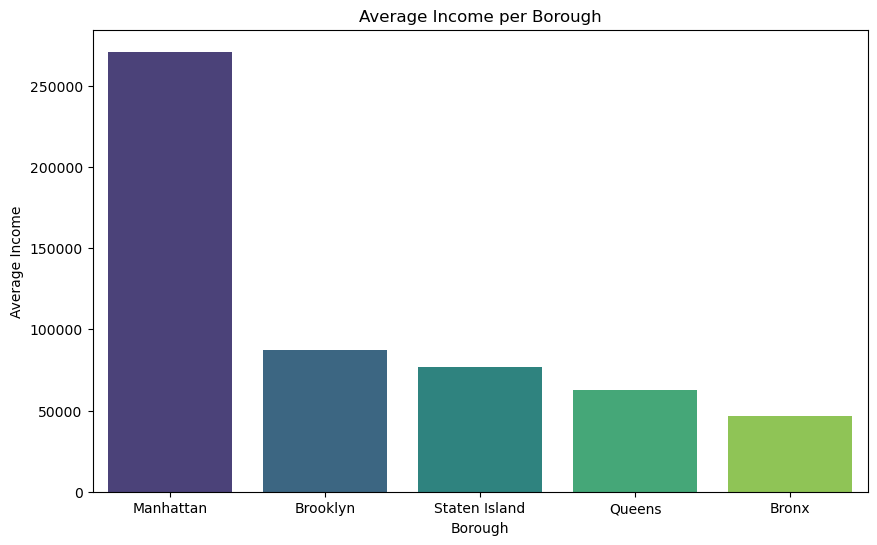

In [40]:
# Calculate the average income per borough
average_income_per_borough = merged_demo_t50_df.groupby('Borough')['Average total income'].mean().reset_index()

# Sort the DataFrame by 'Average total income' in descending order
average_income_per_borough = average_income_per_borough.sort_values(by='Average total income', ascending=False)

# Plotting the average income per borough
plt.figure(figsize=(10, 6))  
sns.barplot(x='Borough', y='Average total income', data=average_income_per_borough, palette='viridis')

plt.title('Average Income per Borough')
plt.xlabel('Borough')
plt.ylabel('Average Income')

plt.savefig('Graphs/average_income_borough.png')
plt.show()


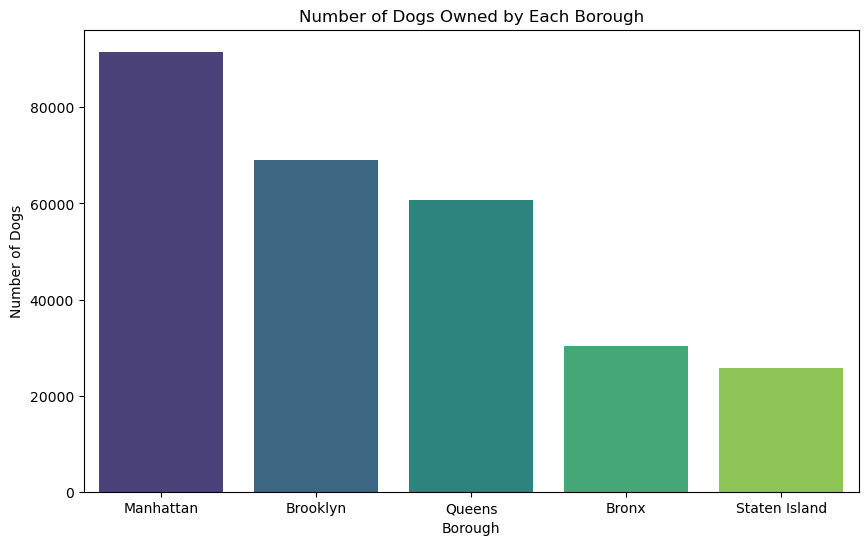

In [42]:
# Count the number of dogs in each borough and reset index to convert Series to DataFrame for seaborn
dogs_per_borough = merged_demo_t50_df['Borough'].value_counts().reset_index()
dogs_per_borough.columns = ['Borough', 'Number of Dogs']  

# Plotting using seaborn
plt.figure(figsize=(10, 6))  
sns.barplot(x='Borough', y='Number of Dogs', data=dogs_per_borough, palette='viridis')

plt.title('Number of Dogs Owned by Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Dogs')
# plt.xticks(rotation=45)  

plt.savefig('Graphs/dogs_owned_borough.png')
plt.show()

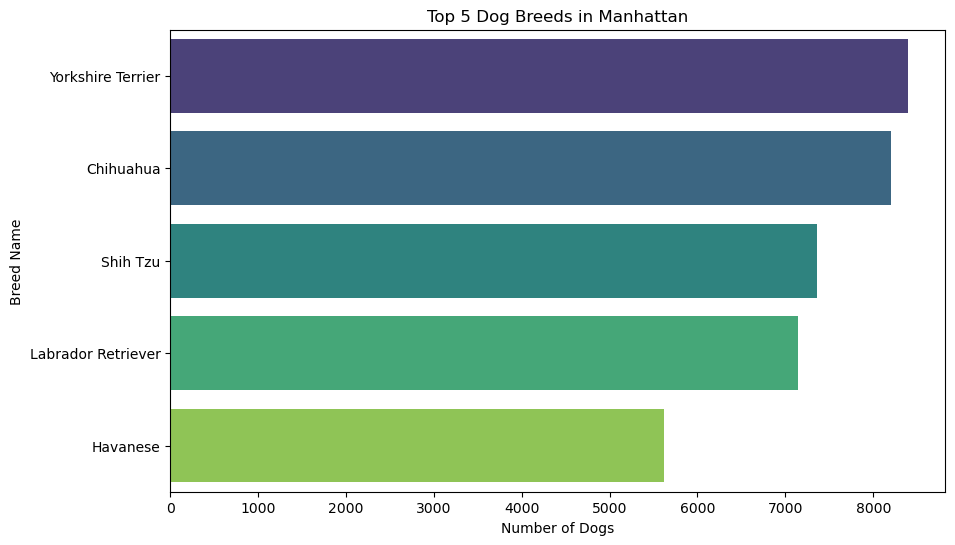

In [43]:
# Income Rank #1
# Filter the DataFrame for only Manhattan borough
manhattan_dogs = merged_demo_t50_df[merged_demo_t50_df['Borough'] == 'Manhattan']

# Count the occurrences of each dog breed in Manhattan
breed_counts = manhattan_dogs['BreedName'].value_counts().reset_index()
breed_counts.columns = ['BreedName', 'Count']  

# Plotting using seaborn
plt.figure(figsize=(10, 6))  
sns.barplot(x='Count', y='BreedName', data=breed_counts[:5], palette='viridis')  

plt.title('Top 5 Dog Breeds in Manhattan')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed Name')

plt.savefig('Graphs/top5_manhattan.png')
plt.show()

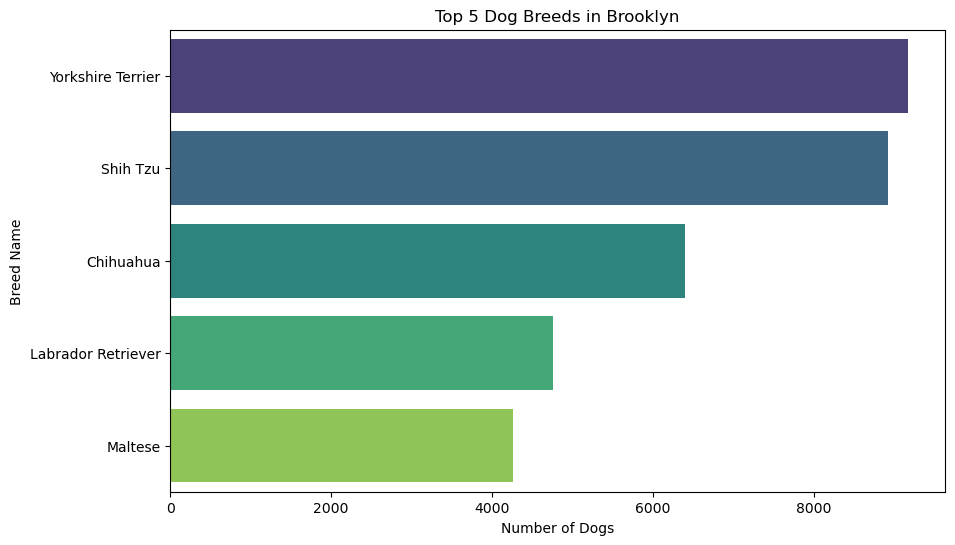

In [44]:
# Income Rank #2
# Filter the DataFrame for only Brooklyn borough
brooklyn_dogs = merged_demo_t50_df[merged_demo_t50_df['Borough'] == 'Brooklyn']

# Count the occurrences of each dog breed in Brooklyn
breed_counts = brooklyn_dogs['BreedName'].value_counts().reset_index()
breed_counts.columns = ['BreedName', 'Count']  

# Plotting using seaborn
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Count', y='BreedName', data=breed_counts[:5], palette='viridis')  

plt.title('Top 5 Dog Breeds in Brooklyn')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed Name')

plt.savefig('Graphs/top5_brooklyn.png')
plt.show()

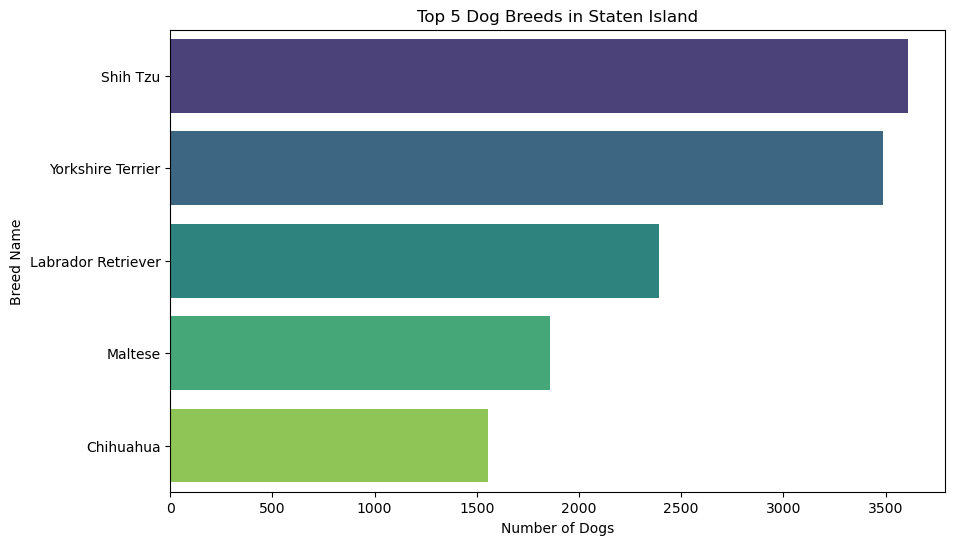

In [45]:
# Income Rank #3
# Filter the DataFrame for only Staten Island borough
staten_dogs = merged_demo_t50_df[merged_demo_t50_df['Borough'] == 'Staten Island']

# Count the occurrences of each dog breed in Staten Island
breed_counts = staten_dogs['BreedName'].value_counts().reset_index()
breed_counts.columns = ['BreedName', 'Count']  

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='BreedName', data=breed_counts[:5], palette='viridis')  

plt.title('Top 5 Dog Breeds in Staten Island')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed Name')

plt.savefig('Graphs/top5_statenI.png')
plt.show()

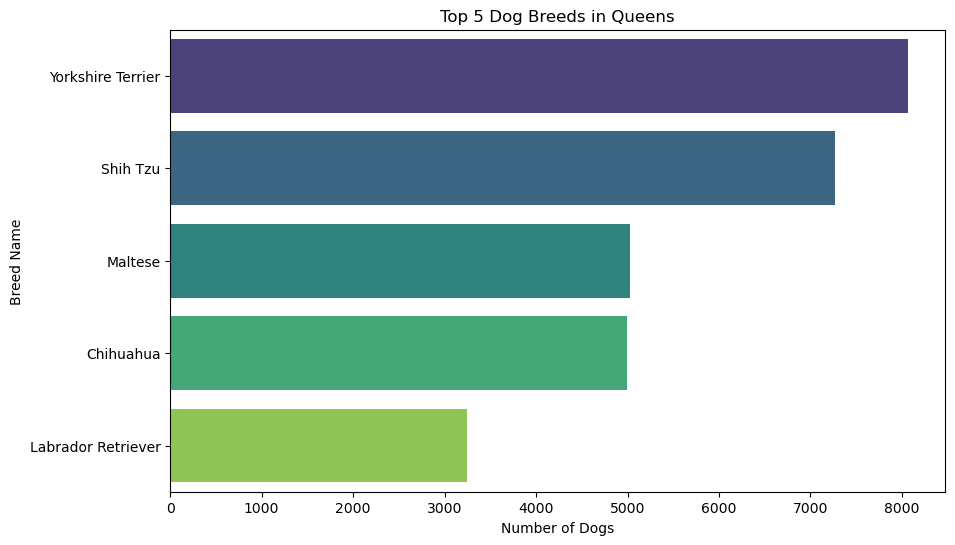

In [46]:
# Income Rank #4
# Filter the DataFrame for only Queens borough
queens_dogs = merged_demo_t50_df[merged_demo_t50_df['Borough'] == 'Queens']

# Count the occurrences of each dog breed in Queens
breed_counts = queens_dogs['BreedName'].value_counts().reset_index()
breed_counts.columns = ['BreedName', 'Count']  

# Plotting using seaborn
plt.figure(figsize=(10, 6))  
sns.barplot(x='Count', y='BreedName', data=breed_counts[:5], palette='viridis')  

plt.title('Top 5 Dog Breeds in Queens')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed Name')

plt.savefig('Graphs/top5_queens.png')
plt.show()

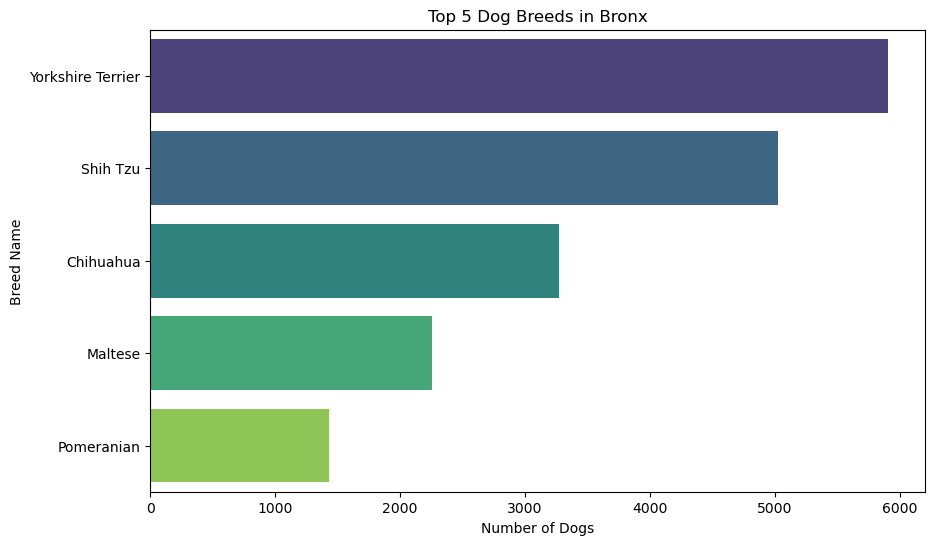

In [47]:
# Income Rank #5
# Filter the DataFrame for only Bronx borough
bronx_dogs = merged_demo_t50_df[merged_demo_t50_df['Borough'] == 'Bronx']

# Count the occurrences of each dog breed in Bronx
breed_counts = bronx_dogs['BreedName'].value_counts().reset_index()
breed_counts.columns = ['BreedName', 'Count']  

# Plotting using seaborn
plt.figure(figsize=(10, 6))  
sns.barplot(x='Count', y='BreedName', data=breed_counts[:5], palette='viridis')  

plt.title('Top 5 Dog Breeds in Bronx')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed Name')

plt.savefig('Graphs/top5_bronx.png')
plt.show()

# Review dog ownership by income category

In [51]:
# Make inncome categories
def categorize_avg_income(avg_income):
    # low_income
    if 0 <= avg_income < 50000:
        return 'Low'
    # middle_income
    elif 50000 <= avg_income < 100000:
        return 'Medium'
    # high_income
    elif 100000 <= avg_income:
        return 'High'
    else:
        return 'Others'

# Applying the function to the DataFrame
merged_demo_t50_df['IncomeClass'] = merged_demo_t50_df['Average total income'].apply(categorize_avg_income)

# Display the DataFrame to verify the categorization
merged_demo_t50_df

,ZipCode,Average total income,AnimalGender,AnimalBirthYear,BreedName,Borough,Unnamed: 0,demo_total_pop,dem_median_age,demo_housing_units,demo_avg_#_per_household,IncomeClass
0,10001,181582,M,2014,Shih Tzu,Manhattan,2,"1,634,989",36.7,"866,644",1.886575,High
1,10001,181582,F,2011,Shiba Inu,Manhattan,2,"1,634,989",36.7,"866,644",1.886575,High
2,10001,181582,M,2014,Shiba Inu,Manhattan,2,"1,634,989",36.7,"866,644",1.886575,High
3,10001,181582,F,2014,Yorkshire Terrier,Manhattan,2,"1,634,989",36.7,"866,644",1.886575,High
4,10001,181582,M,2009,Australian Shepherd,Manhattan,2,"1,634,989",36.7,"866,644",1.886575,High
...,...,...,...,...,...,...,...,...,...,...,...,...
277469,11697,110414,M,2011,Maltese,Queens,3,"2,310,011",37.9,"846,689",2.728287,High
277470,11697,110414,F,2018,Cavalier King Charles Spaniel,Queens,3,"2,310,011",37.9,"846,689",2.728287,High
277471,11697,110414,M,2015,Labrador Retriever,Queens,3,"2,310,011",37.9,"846,689",2.728287,High
277472,11697,110414,F,2012,German Shepherd Dog,Queens,3,"2,310,011",37.9,"846,689",2.728287,High


In [52]:
# Export DataFrame to a CSV file
merged_demo_t50_df.to_csv('merged_demo_t50_df.csv', index=False)

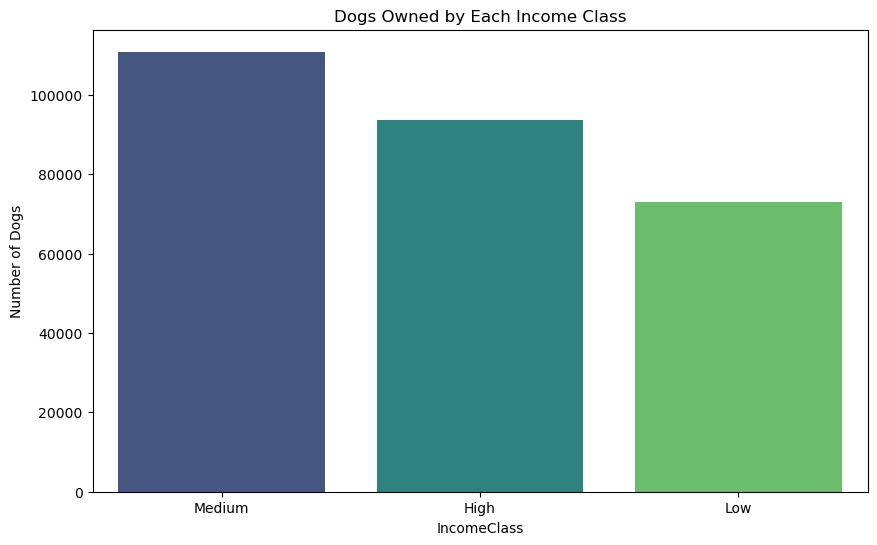

In [53]:
# Count the number of dogs in each income class and reset index to convert Series to DataFrame for seaborn
dogs_per_income_class = merged_demo_t50_df['IncomeClass'].value_counts().reset_index()
dogs_per_income_class.columns = ['IncomeClass', 'Number of Dogs']  

# Plotting using seaborn
plt.figure(figsize=(10, 6))  
sns.barplot(x='IncomeClass', y='Number of Dogs', data=dogs_per_income_class, palette='viridis')

plt.title('Dogs Owned by Each Income Class')
plt.xlabel('IncomeClass')
plt.ylabel('Number of Dogs')
# plt.xticks(rotation=45)  

plt.savefig('Graphs/dog_ownership_income.png')
plt.show()

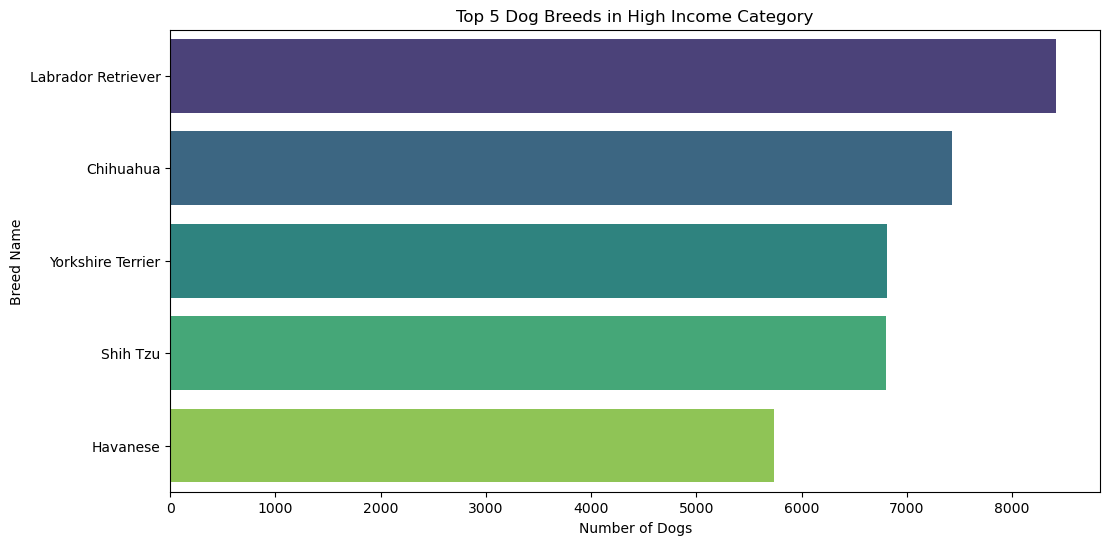

In [59]:
# Dog Breeds owned by high income cateory
# Filter the DataFrame for only High Income Group
high_income_dogs = merged_demo_t50_df[merged_demo_t50_df['IncomeClass'] == 'High']

# Count the occurrences of each dog breed in Manhattan
breed_counts = high_income_dogs['BreedName'].value_counts().reset_index()
breed_counts.columns = ['BreedName', 'Count']  

# Plotting using seaborn
plt.figure(figsize=(12, 6))   
sns.barplot(x='Count', y='BreedName', data=breed_counts[:5], palette='viridis')  

plt.title('Top 5 Dog Breeds in High Income Category')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed Name')

plt.savefig('Graphs/dog_ownership_Hincome.png')
plt.show()

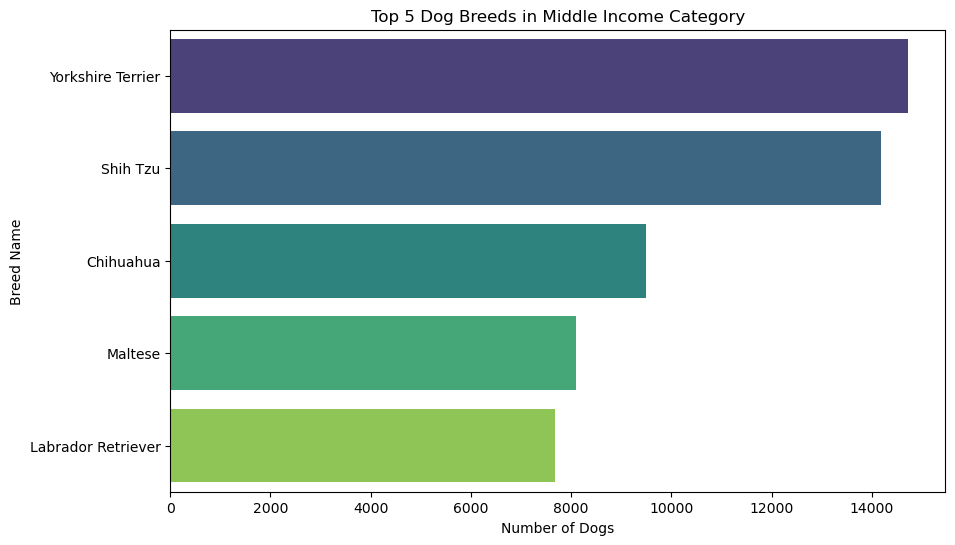

In [56]:
# Dog Breeds owned by middle income cateory
# Filter the DataFrame for only Middle Income group
middle_income_dogs = merged_demo_t50_df[merged_demo_t50_df['IncomeClass'] == 'Medium']

# Count the occurrences of each dog breed in Manhattan
breed_counts = middle_income_dogs['BreedName'].value_counts().reset_index()
breed_counts.columns = ['BreedName', 'Count']  

# Plotting using seaborn
plt.figure(figsize=(10, 6))  
sns.barplot(x='Count', y='BreedName', data=breed_counts[:5], palette='viridis')  

plt.title('Top 5 Dog Breeds in Middle Income Category')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed Name')

plt.savefig('Graphs/dog_ownership_Mincome.png')
plt.show()

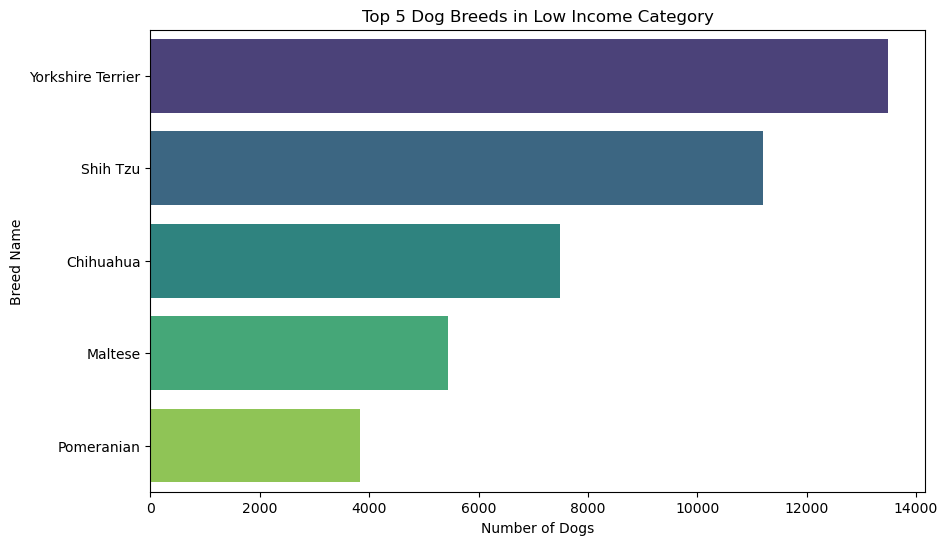

In [57]:
# Dog Breeds owned by low income cateory
# Filter the DataFrame for only Low Income group
low_income_dogs = merged_demo_t50_df[merged_demo_t50_df['IncomeClass'] == 'Low']

# Count the occurrences of each dog breed in Manhattan
breed_counts = low_income_dogs['BreedName'].value_counts().reset_index()
breed_counts.columns = ['BreedName', 'Count']  

# Plotting using seaborn
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Count', y='BreedName', data=breed_counts[:5], palette='viridis')  

plt.title('Top 5 Dog Breeds in Low Income Category')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed Name')

plt.savefig('Graphs/dog_ownership_Lincome.png')
plt.show()